In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Import Data

markers is a nested dictionary with marker data loaded into Pandas dataframe per subject and trial.

In [2]:
markers_dir = "./data/markers"

markers = {}
for root, dirs, files in os.walk(markers_dir):
    # print(root)
    # print(dirs)
    # print(files)
    if not files:
        for subject in dirs:
            markers[subject] = {}
    
    head_tail = os.path.split(root)
    print(head_tail[1])
    for file in files:
        root_ext = os.path.splitext(file)
        trial_path = os.path.join(root, file)
        # print(trial_path)
        # root_ext[0]: ND1, ND2, D1, D2, ...
        # print(root_ext[0])
        trial_df = pd.read_csv(trial_path)
        # markers[head_tail[1]][root_ext[0]] = {"trial_df": pd.read_csv(trial_path), 
        #                                       "timestamps": trial_df["Timestamp"].to_numpy(), 
        #                                       "markers": trial_df["Marker"].to_list()}
        markers[head_tail[1]][root_ext[0]] = {"trial_df": trial_df, 
                                              "timestamps": trial_df["Timestamp"].to_numpy(), 
                                              "markers": trial_df["Marker"].to_list()}

    # for subject, trials in markers.items():
    #     for trial, data in trials.items():
    #         print("   ", trial)
    #         print("      ", data["timestamps"][0])


markers
subject4
subject6
subject3
subject1
subject5
subject2


## Dictionary Structure

ND = non dominant hand

D = dominant hand

ND and D represent trials and each are dictionary entries that have a pandas Dataframe with all the marker data.

The below cell is boilerplate code for iterating through the dictionary per subject and per trial

In [7]:
for subject, trials in markers.items():
    # print(subject)
    for trial, data in trials.items():
        # print("   ", trial)
        # TODO: print keys of dictionary for each trial
        # print(type(data))
        pass

# Data Filtering

## Experiment Duration Calculation

In [3]:
for subject, trials in markers.items():
    for trial, data in trials.items():
        start_index = data["markers"].index("Experiment Start")
        end_index = data["markers"].index("Experiment End")
#         print(markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment End")] \
#                                                 - markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment Start")])
        
#         markers[subject][trial]["duration"] = markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment End")] \
#                                                 - markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment Start")]
        # print(markers[subject][trial])
        
        # data["duration"] = data["timestamps"][data["markers"].index("Experiment End")] - data["timestamps"][data["markers"].index("Experiment Start")]
        data["experiment_length"] = data["timestamps"][end_index] - data["timestamps"][start_index]
        data.update({"timestamps": np.delete(data["timestamps"], [start_index, end_index])})
        # data.update({"timestamps": np.delete(data["timestamps"], [data["markers"].index("Experiment Start"), data["markers"].index("Experiment End")])})
        data["markers"].remove("Experiment Start")
        data["markers"].remove("Experiment End")
        

In [4]:
for subject, trials in markers.items():
    print(subject)
    for trial, data in trials.items():
        print("   ", trial, " duration: ", data["experiment_length"])
        # print("  trial: ", trial, data["timestamps"])
        

subject4
    ND2  duration:  75.09828199999993
    ND1  duration:  76.38666000000012
    D1  duration:  71.34434599999986
    D2  duration:  70.52425149999999
subject6
    ND2  duration:  74.32992350100176
    ND1  duration:  73.91095750000022
    D1  duration:  73.11779449999813
    D2  duration:  80.42560199999934
subject3
    ND2  duration:  70.32544349999989
    ND1  duration:  74.86595550099992
    D1  duration:  64.3442315000002
    D2  duration:  64.12581650000084
subject1
    ND2  duration:  71.09831099999974
    ND1  duration:  79.94344300000012
    D1  duration:  71.89937199999986
    D2  duration:  64.29326599900014
subject5
    ND2  duration:  63.75190549900071
    ND1  duration:  67.96479
    D1  duration:  75.06746899900008
    D2  duration:  66.99032449900005
subject2
    ND2  duration:  83.14426600000024
    ND1  duration:  87.51868149899974
    D1  duration:  86.88485300000002
    D2  duration:  83.3676405000001


## Check order of markers

In [5]:
def check_list(marker_list):
    for i in range(len(marker_list)-1):
        if marker_list[i] == "Target A Start" and marker_list[i+1] != "Target A End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target A End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target A End" and marker_list[i+1] != "Goal A Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal A Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal A Start" and marker_list[i+1] != "Goal A End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal A End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target B Start" and marker_list[i+1] != "Target B End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target B End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target B End" and marker_list[i+1] != "Goal B Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal B Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal B Start" and marker_list[i+1] != "Goal B End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal B End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target C Start" and marker_list[i+1] != "Target C End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target C End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target C End" and marker_list[i+1] != "Goal C Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal C Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal C Start" and marker_list[i+1] != "Goal C End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal C End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target D Start" and marker_list[i+1] != "Target D End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target D End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target D End" and marker_list[i+1] != "Goal D Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal D Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal D Start" and marker_list[i+1] != "Goal D End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal D End but is ", marker_list[i+1])
            break
        # TODO: it's possible to shorten the code for this tremendously. Add case when goal ends, next must be target start

# If no error messages, then good
for subject, trials in markers.items():
    print(subject)
    for trial, data in trials.items():
        print("Trial: ", trial)
        check_list(data["markers"])

subject4
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject6
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject3
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject1
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject5
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject2
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2


## Duration Calculations

Adds durations (duration of target and goal fixations) and positions (target A, B, C or D) to main dictionary

In [6]:
def calculate_duration(timestamp_list, marker_list):
    if len(marker_list) % 4:
        print(len(marker_list))
        print("List not correct size! Please check input list")
        return None, None
    else:
        durations = np.zeros((int(len(marker_list)/4), 2))
        positions = []
        for i in range(durations.shape[0]):
            start_index = i*4
            if marker_list[start_index] == "Target A Start" and marker_list[start_index+1] == "Target A End" and marker_list[start_index+2] == "Goal A Start" and marker_list[start_index+3] == "Goal A End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("A")
            elif marker_list[start_index] == "Target B Start" and marker_list[start_index+1] == "Target B End" and marker_list[start_index+2] == "Goal B Start" and marker_list[start_index+3] == "Goal B End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("B")
            elif marker_list[start_index] == "Target C Start" and marker_list[start_index+1] == "Target C End" and marker_list[start_index+2] == "Goal C Start" and marker_list[start_index+3] == "Goal C End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("C")
            elif marker_list[start_index] == "Target D Start" and marker_list[start_index+1] == "Target D End" and marker_list[start_index+2] == "Goal D Start" and marker_list[start_index+3] == "Goal D End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("D")
            else:
                print("Order of markers is not right!")
                break
        return durations, positions
    

for subject, trials in markers.items():
    print(subject)
    for trial, data in trials.items():
        print("Trial: ", trial)
        duration, position = calculate_duration(data["timestamps"], data["markers"])
        data["durations"] = duration
        data["positions"] = position

subject4
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject6
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject3
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject1
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject5
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject2
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2


# Average Subject Analysis

## Put durations of all trials in a lists depending on dominant or non-dominant and attemp number

In [28]:
def get_durations(marker_dict, target_trial):
    durations_list = []
    positions = []
    for subject, trials in marker_dict.items():
        for trial, data in trials.items():
            if trial.startswith(target_trial):
                durations_list.append(data["durations"])
                positions.extend(data["positions"])
    target_durations = np.vstack(durations_list)
    return target_durations, positions

D_durations, D_positions = get_durations(markers, "D")
ND_durations, ND_positions = get_durations(markers, "ND")

D1_durations, D1_positions = get_durations(markers, "D1")
D2_durations, D2_positions = get_durations(markers, "D2")

ND1_durations, ND1_positions = get_durations(markers, "ND1")
ND2_durations, ND2_positions = get_durations(markers, "ND2")

In [34]:
D_mean = np.mean(D_durations[:,0] + D_durations[:,1])
ND_mean = np.mean(ND_durations[:,0] + ND_durations[:,1])

D1_mean = np.mean(D1_durations[:,0] + D1_durations[:,1])
ND1_mean = np.mean(ND1_durations[:,0] + ND1_durations[:,1])

D2_mean = np.mean(D2_durations[:,0] + D2_durations[:,1])
ND2_mean = np.mean(ND2_durations[:,0] + ND2_durations[:,1])

## Plot

### Scatter Plots

Text(0.5, 0.98, 'Normalized Durations Averaged over all attempts and subjects')

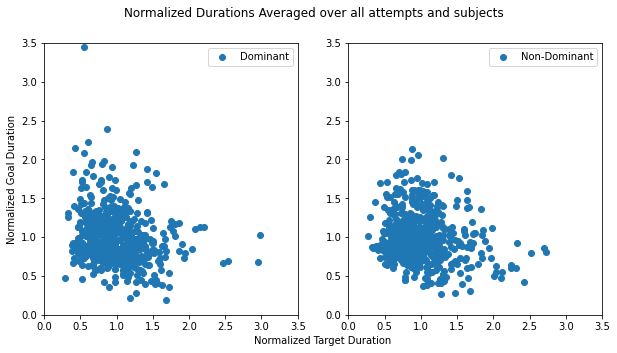

In [86]:
fig_avg, axs_avg = plt.subplots(1,2, figsize=[10,5])

# avg_ylimit= 2.25
# avg_xlimit = 1.5
avg_ylimit= 3.5
avg_xlimit = 3.5

# axs_avg[0].scatter(D_durations[:,0]/D_mean, D_durations[:,1]/D_mean, label='Dominant')
axs_avg[0].scatter(D_durations[:,0]/np.mean(D_durations[:,0]), D_durations[:,1]/np.mean(D_durations[:,1]), label='Dominant')
axs_avg[0].set_xlim(0, avg_xlimit)
axs_avg[0].set_ylim(0, avg_ylimit)
axs_avg[0].legend()
# axs_avg[1].scatter(ND_durations[:,0]/ND_mean, ND_durations[:,1]/ND_mean, label='Non-Dominant')
axs_avg[1].scatter(ND_durations[:,0]/np.mean(ND_durations[:,0]), ND_durations[:,1]/np.mean(ND_durations[:,1]), label='Non-Dominant')
axs_avg[1].set_xlim(0, avg_xlimit)
axs_avg[1].set_ylim(0, avg_ylimit)
axs_avg[1].legend()

fig_avg.add_subplot(1, 1, 1, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Normalized Target Duration")
plt.ylabel("Normalized Goal Duration")
fig_avg.suptitle("Normalized Durations Averaged over all attempts and subjects")

Text(0.5, 0.98, 'Normalized Durations of individual attempts for all subjects')

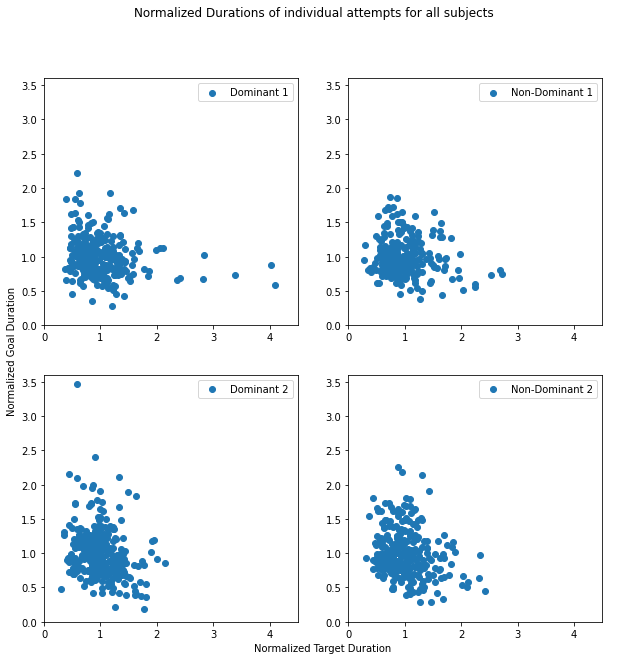

In [81]:
fig, axs = plt.subplots(2, 2, figsize=[10, 10])

# ax_.scatter(D_durations[:,0], D_durations[:,1], label='Dominant')
# ax_.scatter(ND_durations[:,0], ND_durations[:,1], label='Non-Dominant')

ylimit = 3.6
xlimit = 4.5

# axs[0,0].scatter(D1_durations[:,0]/D1_mean, D1_durations[:,1]/D1_mean, label='Dominant 1')
axs[0,0].scatter(D1_durations[:,0]/np.mean(D1_durations[:,0]), D1_durations[:,1]/np.mean(D1_durations[:,1]), label='Dominant 1')
axs[0,0].set_xlim(0, xlimit)
axs[0,0].set_ylim(0, ylimit)
axs[0,0].legend()

# axs[0,1].scatter(ND1_durations[:,0]/ND1_mean, ND1_durations[:,1]/ND1_mean, label='Non-Dominant 1')
axs[0,1].scatter(ND1_durations[:,0]/np.mean(ND1_durations[:,0]), ND1_durations[:,1]/np.mean(ND1_durations[:,1]), label='Non-Dominant 1')
axs[0,1].set_xlim(0, xlimit)
axs[0,1].set_ylim(0, ylimit)
axs[0,1].legend()

# axs[1,0].scatter(D2_durations[:,0]/D2_mean, D2_durations[:,1]/D2_mean, label='Dominant 2')
axs[1,0].scatter(D2_durations[:,0]/np.mean(D2_durations[:,0]), D2_durations[:,1]/np.mean(D2_durations[:,1]), label='Dominant 2')
axs[1,0].set_xlim(0, xlimit)
axs[1,0].set_ylim(0, ylimit)
axs[1,0].legend()

# axs[1,1].scatter(ND2_durations[:,0]/ND2_mean, ND2_durations[:,1]/ND2_mean, label='Non-Dominant 2')
axs[1,1].scatter(ND2_durations[:,0]/np.mean(ND2_durations[:,0]), ND2_durations[:,1]/np.mean(ND2_durations[:,1]), label='Non-Dominant 2')
axs[1,1].set_xlim(0, xlimit)
axs[1,1].set_ylim(0, ylimit)
axs[1,1].legend()

fig.add_subplot(1, 1, 1, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Normalized Target Duration")
plt.ylabel("Normalized Goal Duration")
fig.suptitle("Normalized Durations of individual attempts for all subjects")

### Box Plots

In [91]:
D_ratio = D_durations[:,0]/D_durations[:,1]
ND_ratio = ND_durations[:, 0]/ND_durations[:,1]

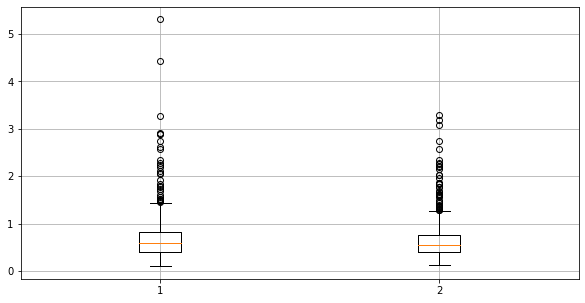

In [97]:
fig_avg_box, ax_avg_box = plt.subplots(figsize=[10, 5])

ax_avg_box.boxplot([D_ratio, ND_ratio])
plt.grid()
#lol

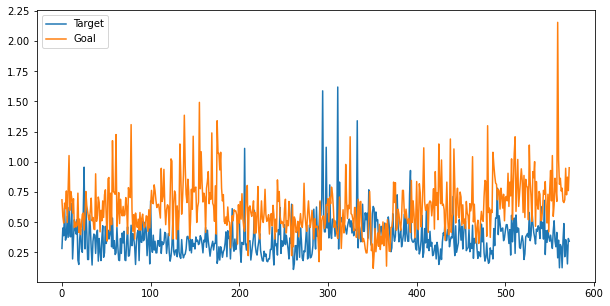

In [93]:
fig_avg_plot, ax_avg_plot = plt.subplots(figsize=[10, 5])

ax_avg_plot.plot(range(D_durations[:,0].shape[0]), D_durations[:,0]/D_mean, label = 'Target')
ax_avg_plot.plot(range(D_durations[:,1].shape[0]), D_durations[:,1]/D_mean, label = 'Goal')
ax_avg_plot.legend()

# Per Subject Analysis

Select subject of interest:

In [78]:
soi = "subject1"